## Part 4

- Create a new set of toy datasets for regression problems.

- Come up with your own ideas on different datasets of varying difficulty, that would help you compare the pros & cons of different algorithms.

- Use these datasets to visualize LinearRegression, Support Vector Regression, Nearest Neighbor Regression, and Decision Trees

We can create various toy datasets to analyse the different regression methods. Here, I would like to consider three different data sets. They are -
- A simple linear relationship with separable noise
- A non-linear relationship
- A multi-feature dataset with outliers

I will generate these datasets using random function.

#### Linear Data set

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
X = np.linspace(1,500,2000)
y = 1.5*X+2+np.random.normal(0,1,2000)
data1 = pd.DataFrame({'Feature1': X.flatten(),'Target':y})
data1.head()

,Feature1,Target
0,1.000000,3.996714
1,1.249625,3.736173
2,1.499250,4.896563
3,1.748874,6.146342
4,1.998499,4.763595


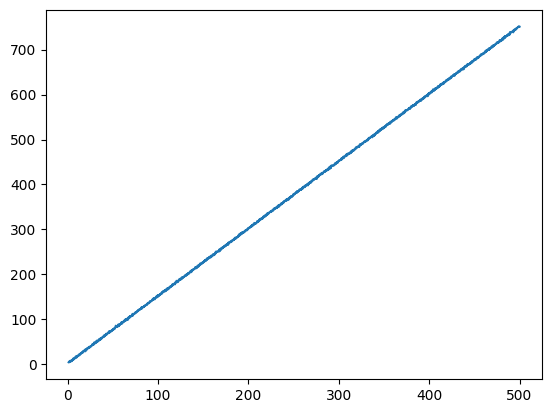

In [2]:
import matplotlib.pyplot as plt
plt.plot(data1['Feature1'], data1['Target'])

#### Non-Linear Data set

In [3]:
X = np.sort(5*np.random.rand(1800,1), axis = 0)
y = np.sin(X).ravel()
data2 = pd.DataFrame({'Feature1': X.flatten(), 'Target':y})
data2.head()

,Feature1,Target
0,0.000058,0.000058
1,0.000154,0.000154
2,0.000673,0.000673
3,0.003267,0.003267
4,0.005560,0.005560


In [4]:
data2.shape

(1800, 2)

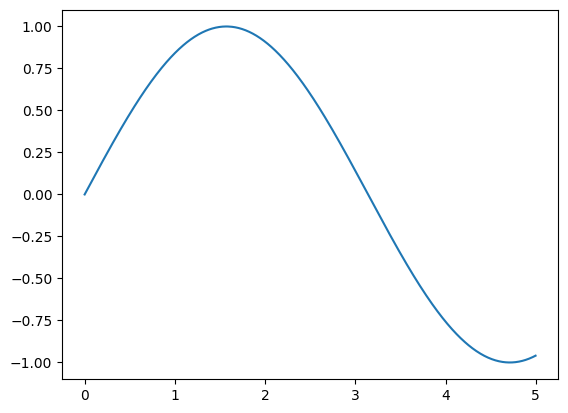

In [5]:
plt.plot(data2['Feature1'],data2['Target'])

### Multi-Feature Data set

In [6]:
X = np.random.rand(1000,4)
y = 1.5*X[:,0]+ 2*X[:,1]-0.5*X[:,2]+2*X[:,3] +np.random.normal(0,0.5,1000)
y[35],y[97],y[489],y[687],y[894] = 30,45,60,45,58
data3 = pd.DataFrame({'Feature1': X[:,0].flatten(), 'Feature2': X[:,1].flatten(), 'Feature3': X[:,2].flatten(), 'Feature4': X[:,3].flatten(), 'Target': y})
data3.head()

,Feature1,Feature2,Feature3,Feature4,Target
0,0.825932,0.631459,0.784405,0.598563,4.378243
1,0.414141,0.957946,0.541114,0.605090,3.241843
2,0.220488,0.625651,0.571608,0.184838,1.745284
3,0.059587,0.604359,0.763692,0.523401,2.541059
4,0.226773,0.666522,0.080106,0.441834,2.212570


Now, we have three different data sets. I will perform the four regression models on these and determine which suits each of the data set. The models that will be performed are -
- Linear Regression
- Support Vector Machine Regression
- KN Regression
- Decision Tree Regression

In [7]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR

In [8]:
from sklearn.model_selection import train_test_split
data1_train, data1_test, data1_target_train, data1_target_test = train_test_split(data1['Feature1'], data1['Target'], test_size = 0.3, random_state = 42)
print(f'Training samples of data1: {data1_train.shape[0]:,}')
print(f'Test samples of data1: {data1_test.shape[0]:,}')

data2_train, data2_test, data2_target_train, data2_target_test = train_test_split(data2['Feature1'], data2['Target'], test_size = 0.3, random_state = 42)
print(f'Training samples for data2: {data2_train.shape[0]:,}')
print(f'Test samples for data2: {data2_test.shape[0]:,}')

data3_features = data3[['Feature1','Feature2','Feature3','Feature4']]
data3_train, data3_test, data3_target_train, data3_target_test = train_test_split(data3_features, data3['Target'], test_size = 0.3, random_state = 42)
print(f'Training samples for data3: {data3_train.shape[0]:,}')
print(f'Test samples for data3: {data3_test.shape[0]:,}')

Training samples of data1: 1,400
Test samples of data1: 600
Training samples for data2: 1,260
Test samples for data2: 540
Training samples for data3: 700
Test samples for data3: 300


### 1) Linear Regression
Linear Regression is a simple model that is used in predicting target variable based on the features. It fits a linear relationship between the features and the target variable making the model simple. However, it gives anomalies with non-linear and complex data sets.

In [9]:
lr_model = LR()

#### 1.a) Linear Regression on Data1

In [10]:
data1_train = np.array(data1_train).reshape(-1, 1)
data1_target_train = np.array(data1_target_train).reshape(-1, 1)
data1_test = np.array(data1_test).reshape(-1, 1)
data1_target_test = np.array(data1_target_test).reshape(-1, 1)

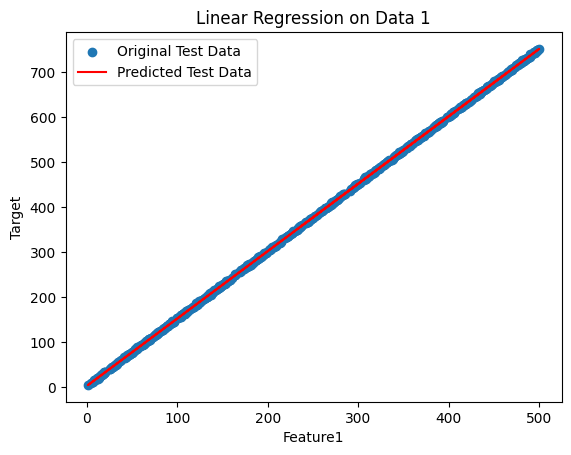

In [11]:
lr_model.fit(data1_train,data1_target_train)
data1_train_score = lr_model.score(data1_train,data1_target_train)
data1_pred = lr_model.predict(data1_test)
plt.scatter(data1_test, data1_target_test, label = 'Original Test Data')
plt.plot(data1_test, data1_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Linear Regression on Data 1')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
mse_data1_test = mean_squared_error(data1_target_test, data1_pred)
print(f'Accuracy score on train data set using LR: {data1_train_score:.2%}')
print(f'Mean Squared Error for test data using LR: {mse_data1_test:.2f}')

Accuracy score on train data set using LR: 100.00%
Mean Squared Error for test data using LR: 0.97


#### 1.b) Linear Regression on Data2

In [13]:
data2_train = np.array(data2_train).reshape(-1, 1)
data2_target_train = np.array(data2_target_train).reshape(-1, 1)
data2_test = np.array(data2_test).reshape(-1, 1)
data2_target_test = np.array(data2_target_test).reshape(-1, 1)

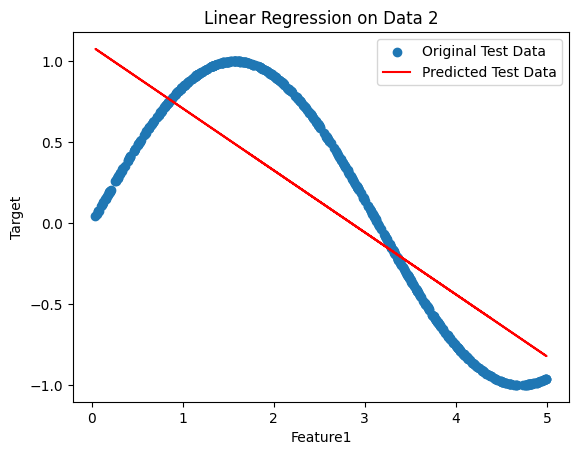

In [14]:
lr_model.fit(data2_train,data2_target_train)
data2_train_score = lr_model.score(data2_train,data2_target_train)
data2_pred = lr_model.predict(data2_test)
plt.scatter(data2_test, data2_target_test, label = 'Original Test Data')
plt.plot(data2_test, data2_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Linear Regression on Data 2')
plt.legend()
plt.show()

In [15]:
mse_data2_test = mean_squared_error(data2_target_test, data2_pred)
print(f'Accuracy score on train data set using LR: {data2_train_score:.2%}')
print(f'Mean Squared Error for test data using LR: {mse_data2_test:.2f}')

Accuracy score on train data set using LR: 62.35%
Mean Squared Error for test data using LR: 0.16


#### 1.c) Linear Regression on Data3

In [16]:
lr_model.fit(data3_train,data3_target_train)
data3_train_score = lr_model.score(data3_train,data3_target_train)
data3_pred = lr_model.predict(data3_test)

In [17]:
mse_data3_test = mean_squared_error(data3_target_test, data3_pred)
print(f'Accuracy score on train data set using LR: {data3_train_score:.2%}')
print(f'Mean Squared Error for test data using LR: {mse_data3_test:.2f}')

Accuracy score on train data set using LR: 12.79%
Mean Squared Error for test data using LR: 22.07


> From the above model fitting and predictions, it is very clear that Linear Regression model only works well with Linear data, i.e., data1. It gives almost perfect predictions on test data set and high accuacy score for train data set. Here is a summary of the same.

|  Data Set  |  Train Accuracy  |   Test MSE  |
|------------|------------------|-------------|
|  Data 1    |     100.00%      |     0.97    |
|  Data 2    |      62.35%      |     0.16    |
|  Data 3    |      12.79%      |     22.07   |

High Mean Squared Error(MSE) denotes that the prediciton is far from the actual test data and is unreliable.

> <b> Linear Regression works well with a Linear data set</b>


### 2) Support Vector Machine Regression
Support Vector machine classifiers usually find a hyperplane that classifies the dat apoints. Similarly, SVM regressors define hyperplanes, however, a bit more flexible to accomodate errors so that it can hanlde continuous target variables as well.

In [18]:
svm_model = SVR()

#### 2.a) SVM regressor with Data 1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


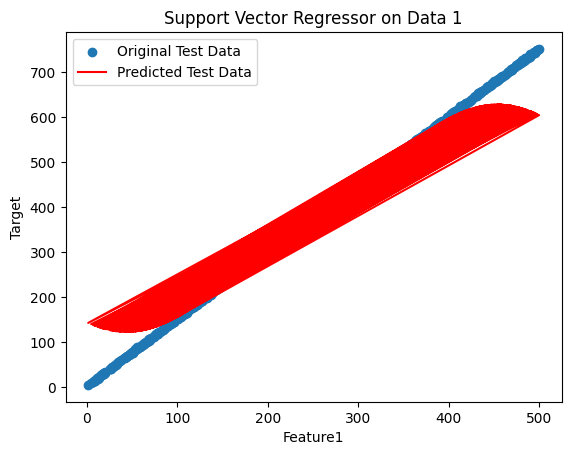

In [19]:
svm_model.fit(data1_train,data1_target_train)
data1_train_score = svm_model.score(data1_train,data1_target_train)
data1_pred = svm_model.predict(data1_test)
plt.scatter(data1_test, data1_target_test, label = 'Original Test Data')
plt.plot(data1_test, data1_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Support Vector Regressor on Data 1')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
mse_data1_test = mean_squared_error(data1_target_test, data1_pred)
print(f'Accuracy score on train data set using SVR: {data1_train_score:.2%}')
print(f'Mean Squared Error for test data using SVR: {mse_data1_test:.2f}')

Accuracy score on train data set using SVR: 95.74%
Mean Squared Error for test data using SVR: 1928.59


#### 2.b) Support Vector Regressor on Data 2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


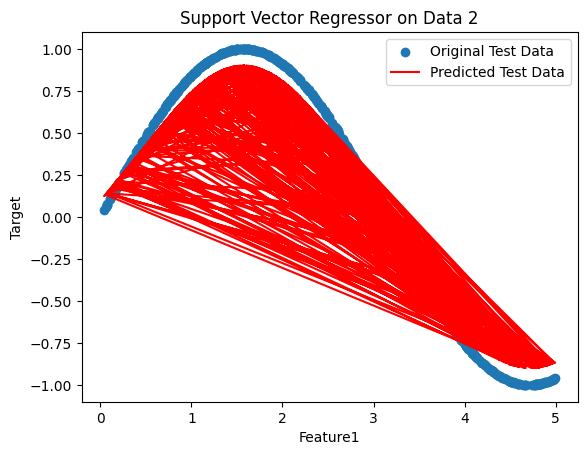

In [21]:
svm_model.fit(data2_train,data2_target_train)
data2_train_score = svm_model.score(data2_train,data2_target_train)
data2_pred = svm_model.predict(data2_test)
plt.scatter(data2_test, data2_target_test, label = 'Original Test Data')
plt.plot(data2_test, data2_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Support Vector Regressor on Data 2')
plt.legend()
plt.show()

In [22]:
mse_data2_test = mean_squared_error(data2_target_test, data2_pred)
print(f'Accuracy score on train data set using SVR: {data2_train_score:.2%}')
print(f'Mean Squared Error for test data using SVR: {mse_data2_test:.2f}')

Accuracy score on train data set using SVR: 98.70%
Mean Squared Error for test data using SVR: 0.01


#### 2.c) Support Vector Regressor on Data 3

In [23]:
svm_model.fit(data3_train,data3_target_train)
data3_train_score = svm_model.score(data3_train,data3_target_train)
data3_pred = svm_model.predict(data3_test)

In [24]:
mse_data3_test = mean_squared_error(data3_target_test, data3_pred)
print(f'Accuracy score on train data set using SVR: {data3_train_score:.2%}')
print(f'Mean Squared Error for test data using SVR: {mse_data3_test:.2f}')

Accuracy score on train data set using SVR: 13.35%
Mean Squared Error for test data using SVR: 22.26


> From the above model fitting and predictions, it is very clear that Support Vector regressor model works well with Linear data and Non-linear data, i.e., data1 and data2. It gives almost perfect predictions on test data set and high accuacy score for train data set for data2.

>However, for data1, it gives a high MSE value. Here is a summary of the same.

|  Data Set  |  Train Accuracy  |   Test MSE  |
|------------|------------------|-------------|
|  Data 1    |      95.74%      |    1928.59  |
|  Data 2    |      98.70%      |     0.01    |
|  Data 3    |      13.35%      |     22.26   |

High Mean Squared Error(MSE) denotes that the prediciton is far from the actual test data and is unreliable.

> <b> Support Vector Regression works well with a Non-Linear data set</b>


### 3) K-Nearest Neighbors Regression
It computes the distance between the target value in test data set and those in the train data set. It is dependent on the distribution of the training data set on the n-dimensional space and predicts the test values based on that.

It can be computationally expensive as it calculates the distance for each of the data point.

In [25]:
knr_model = KNR(n_neighbors = 5)

#### 3.a) K-Nearest Neighbor Regression on Data 1

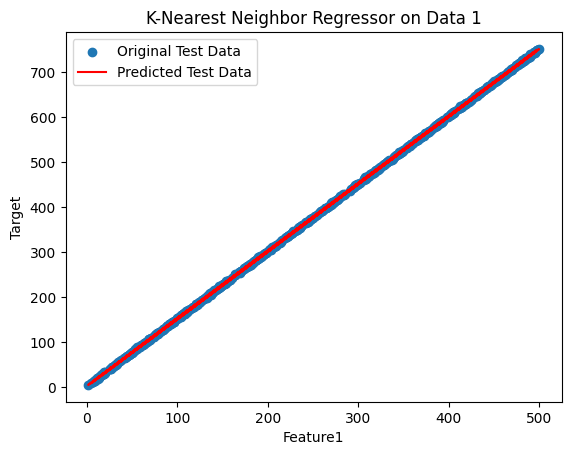

In [26]:
knr_model.fit(data1_train,data1_target_train)
data1_train_score =knr_model.score(data1_train,data1_target_train)
data1_pred = knr_model.predict(data1_test)
plt.scatter(data1_test, data1_target_test, label = 'Original Test Data')
plt.plot(data1_test, data1_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('K-Nearest Neighbor Regressor on Data 1')
plt.legend()
plt.show()

In [27]:
mse_data1_test = mean_squared_error(data1_target_test, data1_pred)
print(f'Accuracy score on train data set using KNR: {data1_train_score:.2%}')
print(f'Mean Squared Error for test data using KNR: {mse_data1_test:.2f}')

Accuracy score on train data set using KNR: 100.00%
Mean Squared Error for test data using KNR: 1.40


#### 3.b) K-Nearest Neighbor Regressor on Data 2

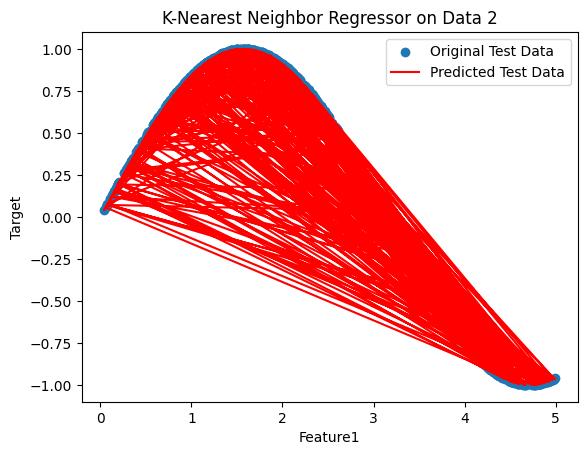

In [28]:
knr_model.fit(data2_train,data2_target_train)
data2_train_score = knr_model.score(data2_train,data2_target_train)
data2_pred = knr_model.predict(data2_test)
plt.scatter(data2_test, data2_target_test, label = 'Original Test Data')
plt.plot(data2_test, data2_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('K-Nearest Neighbor Regressor on Data 2')
plt.legend()
plt.show()

In [29]:
mse_data2_test = mean_squared_error(data2_target_test, data2_pred)
print(f'Accuracy score on train data set using KNR: {data2_train_score:.2%}')
print(f'Mean Squared Error for test data using KNR: {mse_data2_test:.2f}')

Accuracy score on train data set using KNR: 100.00%
Mean Squared Error for test data using KNR: 0.00


#### 3.c) K-Nearest Neighbor Regressor on Data 3

In [30]:
knr_model.fit(data3_train,data3_target_train)
data3_train_score = knr_model.score(data3_train,data3_target_train)
data3_pred = knr_model.predict(data3_test)

In [31]:
mse_data3_test = mean_squared_error(data3_target_test, data3_pred)
print(f'Accuracy score on train data set using KNR: {data3_train_score:.2%}')
print(f'Mean Squared Error for test data using KNR: {mse_data3_test:.2f}')

Accuracy score on train data set using KNR: 29.88%
Mean Squared Error for test data using KNR: 22.97


> From the above model fitting and predictions, it is very clear that K-Nearest Neighbor regressor model works well with Linear data and Non-linear data, i.e., data1 and data2. It gives almost perfect predictions on test data set and high accuacy score for train data set for data1 and data2.


|  Data Set  |  Train Accuracy  |   Test MSE  |
|------------|------------------|-------------|
|  Data 1    |     100.00%      |     1.40    |
|  Data 2    |     100.00%      |     0.00    |
|  Data 3    |      29.88%      |     22.97   |

High Mean Squared Error(MSE) denotes that the prediciton is far from the actual test data and is unreliable.

We observe that the third data set has outliers and is more complex. KNR shows a better accuracy on train data set as compared to other models. A better tuning of hyper-parameters could give a better accuracy

> <b> K-Nearest neighbor Regression works well with Linear and Non-Linear data sets</b>


### 4) Decision Tree Regressor
Decision tree regressor involves recursuve partioning of feature space into subsets that predict the target variables. It usually predicts linear as well as non-linear relations effectively. They also provides insights about the decision-making process as one moves form the root to the leaves.

In [32]:
dtr_model = DTR(max_depth = 7)

#### 4.a) Decision Tree Regressor on Data 1

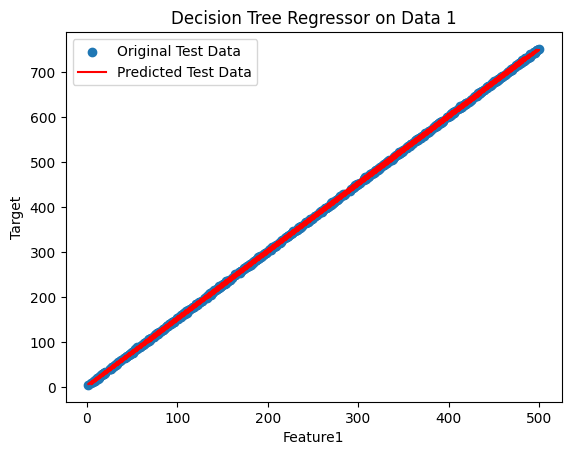

In [33]:
dtr_model.fit(data1_train,data1_target_train)
data1_train_score =dtr_model.score(data1_train,data1_target_train)
data1_pred = dtr_model.predict(data1_test)
plt.scatter(data1_test, data1_target_test, label = 'Original Test Data')
plt.plot(data1_test, data1_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Decision Tree Regressor on Data 1')
plt.legend()
plt.show()

In [34]:
mse_data1_test = mean_squared_error(data1_target_test, data1_pred)
print(f'Accuracy score on train data set using DTR: {data1_train_score:.2%}')
print(f'Mean Squared Error for test data using DTR: {mse_data1_test:.2f}')

Accuracy score on train data set using DTR: 99.99%
Mean Squared Error for test data using DTR: 5.25


#### 4.b) Decision Tree Regressor on Data 2

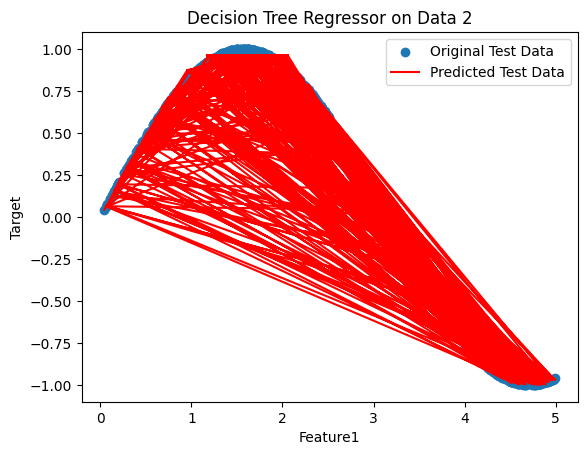

In [35]:
dtr_model.fit(data2_train,data2_target_train)
data2_train_score = dtr_model.score(data2_train,data2_target_train)
data2_pred = dtr_model.predict(data2_test)
plt.scatter(data2_test, data2_target_test, label = 'Original Test Data')
plt.plot(data2_test, data2_pred, label = 'Predicted Test Data', c = 'r')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Decision Tree Regressor on Data 2')
plt.legend()
plt.show()

In [36]:
mse_data2_test = mean_squared_error(data2_target_test, data2_pred)
print(f'Accuracy score on train data set using DTR: {data2_train_score:.2%}')
print(f'Mean Squared Error for test data using DTR: {mse_data2_test:.2f}')

Accuracy score on train data set using DTR: 99.94%
Mean Squared Error for test data using DTR: 0.00


#### 4.c) Decision Tree Regressor on Data 3

In [37]:
dtr_model.fit(data3_train,data3_target_train)
data3_train_score = dtr_model.score(data3_train,data3_target_train)
data3_pred = dtr_model.predict(data3_test)

In [38]:
mse_data3_test = mean_squared_error(data3_target_test, data3_pred)
print(f'Accuracy score on train data set using DTR: {data3_train_score:.2%}')
print(f'Mean Squared Error for test data using DTR: {mse_data3_test:.2f}')

Accuracy score on train data set using DTR: 97.23%
Mean Squared Error for test data using DTR: 22.77


> From the above model fitting and predictions, it is very clear that K-Nearest Neighbor regressor model works well all the three data sets, i.e., data1, data2 and data3. It gives almost perfect predictions on test data set and high accuracy score for train data set for all of them.


|  Data Set  |  Train Accuracy  |   Test MSE  |
|------------|------------------|-------------|
|  Data 1    |      99.99%      |    5.25     |
|  Data 2    |      99.94%      |    0.00     |
|  Data 3    |      97.23%      |    22.77    |


DTR gives an excellent accuracy score for train data sets and low MSE for the test data sets. DTR proves to handle linear, non-linear, and complex data sets with outliers more efficiently than all the other models.

> <b> Decision Tree Regression works well all the data sets</b>


The following conclusion can be made from the above analysis, we can apply models in the order of relevance - 
- Data 1: Linear Regression, K-Nearest Neighbor Regression
- Data 2: Support Vector Regression, Decision Tree Regression, K-Nearest Neighbor Regression
- Data 3: Decision Tree Regression